In [286]:
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt
from GCR import GCRQuery
from astropy.table import Table
from GCR import GCRQuery
from astropy.table import Column
import GCRCatalogs                                                                                               
from astropy.table import Table
import healpy as hp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [287]:
outpath = "/pbs/home/f/flesplin"

**redmapper**

In [288]:
redmapper_catalog = Table.read('/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/cosmoDC2_v1.1.4_redmapper_v0.8.1/Catalog.fits')
#print(redmapper_catalog)
#id, ra, dec, z, mass
redmapper_members = Table.read('/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/cosmoDC2_v1.1.4_redmapper_v0.8.1/Catalog_members.fits')
#redmapper_members
#id, id_cluster, ra, dec, pmem, mag_r,_mag_i,mag_Z

In [289]:
wasp_catalog = Table.read('/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/wazp/6685/Catalog.fits')
#print(wasp_catalog)
#id, ra, dec, z, mass
wasp_members = Table.read('/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/wazp/6685//Catalog_members.fits')
wasp_members
#id, id_cluster, ra, dec,z, pmem

id,id_cluster,ra,dec,z,pmem,mag_r,mag_z,mag_i
int64,int64,float64,float64,float32,float32,float32,float32,float32
7062883068,4746,67.1119439733344,-35.3692853004754,0.5002246,0.14663377,22.4721,21.9023,21.6538
7062804294,4746,67.0944604728531,-35.3561315579412,0.45889586,0.6251361,20.9791,20.2255,19.8504
7062804292,4746,67.0991271665194,-35.3490942174442,0.4586813,0.88036644,21.2361,20.4756,20.0716
7062804296,4746,67.1003426147954,-35.3509282451955,0.5051649,0.7897182,21.3033,20.7292,20.4187
7062878010,4746,67.1097615790358,-35.3481283156688,0.4496114,0.9011189,21.4574,20.6808,20.3092
7062804302,4746,67.1054942407874,-35.3440583322309,0.47166955,0.9832818,20.5111,19.7175,19.2738
7062878012,4746,67.1090187358635,-35.3455301210136,0.48341572,0.96133965,20.5033,19.7961,19.4149
7062812728,4746,67.12396581155,-35.3479337549826,0.41189894,0.28723288,22.4592,21.8743,21.5668
7062691647,4746,67.1049338416812,-35.3308126159824,0.39005843,0.48098534,20.8963,20.2778,19.953


**For redmapper :**

In [290]:
redmapper_corri = redmapper_catalog[redmapper_catalog['mass']>20]
print('biggest cluster in term of galaxies')
print(max(redmapper_corri['mass']))
print('numbers of clusters with at leat 20 galaxies')
print(len(redmapper_corri))

biggest cluster in term of galaxies
203.45981
numbers of clusters with at leat 20 galaxies
536


**For wasp :**

In [291]:
wasp_corri = wasp_catalog[wasp_catalog['mass']>20]
print('biggest cluster in term of galaxies:')
print(max(wasp_corri['mass']))
print('numbers of clusters with at leat 20 galaxies')
print(len(wasp_corri))

biggest cluster in term of galaxies:
251.69345
numbers of clusters with at leat 20 galaxies
1401


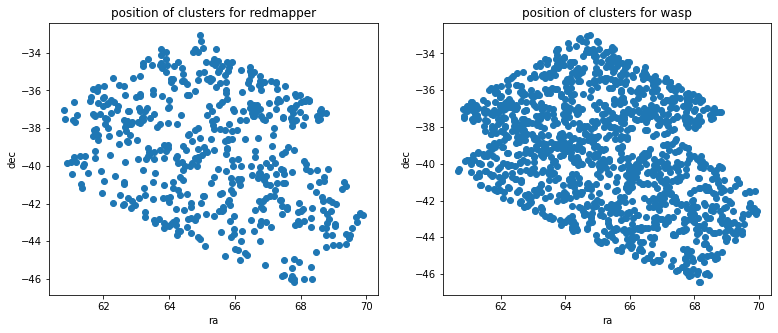

In [292]:
plt.figure(figsize=[20,5])
plt.subplot(131)
plt.scatter(redmapper_corri['ra'],redmapper_corri['dec'])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('position of clusters for redmapper')
plt.subplot(132)
plt.scatter(wasp_corri['ra'],wasp_corri['dec'])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('position of clusters for wasp')
plt.show()


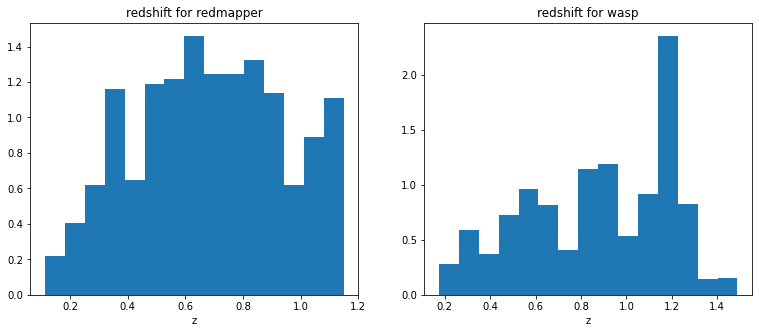

In [293]:
plt.figure(figsize=[20,5])
plt.subplot(131)
plt.hist(redmapper_corri['z'], bins = 15,density=True)
plt.title('redshift for redmapper')
plt.xlabel('z')
plt.subplot(132)
plt.hist(wasp_corri['z'], bins = 15, density=True)
plt.title('redshift for wasp')
plt.xlabel('z')
plt.show()

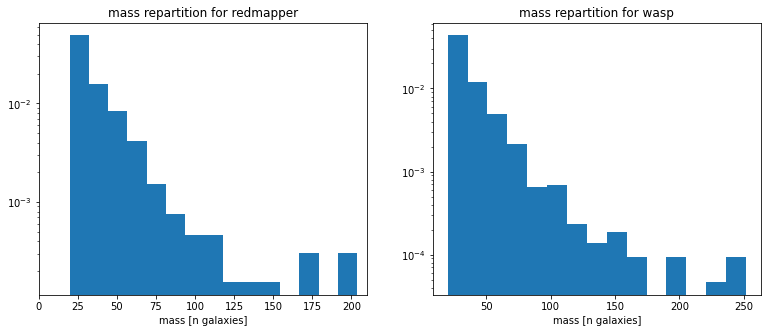

In [294]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(redmapper_corri['mass'], bins = 15, density=True)
plt.title('mass repartition for redmapper')
plt.xlabel('mass')
plt.yscale('log')
plt.xlim(0,210)
plt.xlabel('mass [n galaxies]')
plt.subplot(132)
plt.hist(wasp_corri['mass'], bins = 15,density=True)
plt.title('mass repartition for wasp')
plt.xlabel('mass')
plt.yscale('log')
#plt.xlim(0,210)
plt.xlabel('mass [n galaxies]')
plt.show()

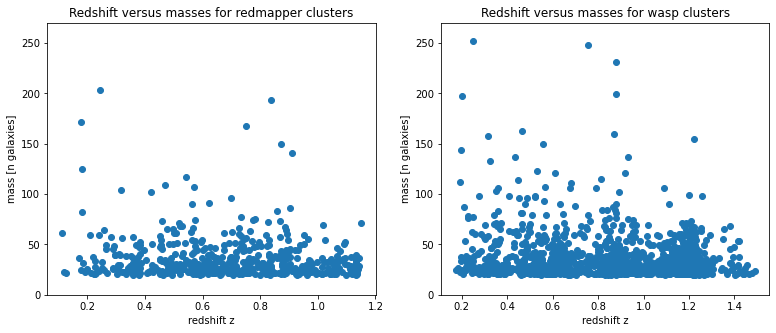

In [295]:
plt.figure(figsize=[20,5])
plt.subplot(131)
plt.scatter(redmapper_corri['z'], redmapper_corri['mass'])
plt.ylim(0,270)
plt.xlabel('redshift z')
plt.ylabel('mass [n galaxies]')
plt.title('Redshift versus masses for redmapper clusters')
plt.subplot(132)
plt.scatter(wasp_corri['z'], wasp_corri['mass'])
plt.ylim(0,270)
plt.xlabel('redshift z')
plt.ylabel('mass [n galaxies]')
plt.title('Redshift versus masses for wasp clusters')
plt.show()


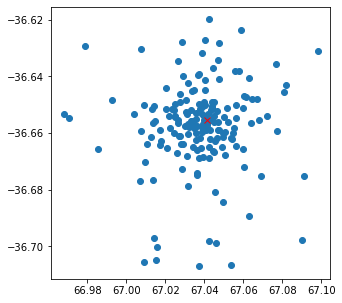

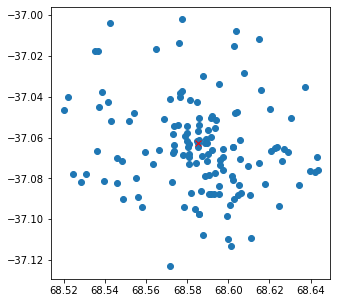

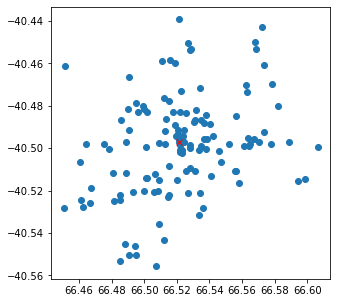

In [296]:
i=0
for cluster in redmapper_corri:
    i= i+1
    if (i==4):
        break
        
    my_cluster_id = cluster['id']
    #for galaxie in redmapper_members:
        #if  (my_cluster_id == galaxie['id_cluster']):
            #print ('success')
    my_cluster_members = redmapper_members[redmapper_members['id_cluster'] == my_cluster_id]

        
    plt.figure(figsize=[5,5])
    plt.scatter(my_cluster_members['ra'], my_cluster_members['dec'])
    plt.plot(cluster['ra'], cluster['dec'],'xr')
    plt.show()

In [297]:
i=0
filter_array = []   
for members in redmapper_members:  
    i=i+1
    my_members = members['id_cluster']
    if (my_members in redmapper_corri['id']):
        filter_array.append(True)
    else:
        filter_array.append(False)
my_new_members = redmapper_members[filter_array]
    #my_new_members = redmapper_members[filter_array]
    #for galaxie in redmapper_members:
        #if  (my_cluster_id == galaxie['id_cluster']):
            #print ('success')
len(my_new_members)
print(i)

113048


In [334]:
i=0
filter_array = []   
for members in wasp_members:  
    i=i+1
    my_members = members['id_cluster']
    if (my_members in wasp_corri['id']):
        filter_array.append(True)
    else:
        filter_array.append(False)
my_new_members_wasp = wasp_members[filter_array]

In [299]:
z = my_new_members['ra']
new_col=Column(z,name='znew')
my_new_members.add_column(new_col)

In [300]:
#my_new_members

In [301]:
i=0
j=0
filter_array=[]
#print(my_new_members)
#print(redmapper_corri)
for id_members in my_new_members:
    #print(id_members)
    i=i+1
    id_gala = id_members['id_cluster']
    for id_cluster in redmapper_corri:
        id_clus=id_cluster['id']
        #print(id_cluster['z'])
        #print(my_new_members['znew'][i-1])
        if(id_clus==id_gala):
            z_cl=id_cluster['z']
            my_new_members['znew'][i-1]=z_cl
            #print(z_cl)
            #print(my_new_members['znew'][i-1])   
        else:
            continue

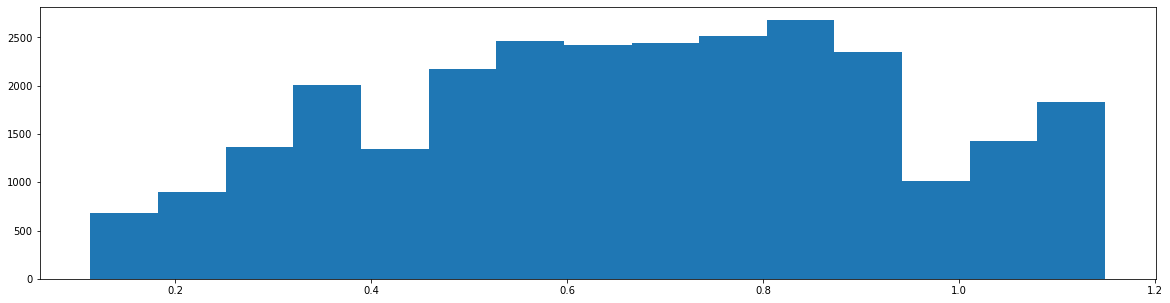

In [364]:
plt.figure()
plt.hist(my_new_members['znew'],bins=15)
plt.show()

In [307]:
i=0
filter_array = []   
for members in wasp_members:  
    i=i+1
    my_members = members['id_cluster']
    if (my_members in wasp_corri['id']):
        filter_array.append(True)
    else:
        filter_array.append(False)
my_new_members_wasp = wasp_members[filter_array]
    #my_new_members = redmapper_members[filter_array]
    #for galaxie in redmapper_members:
        #if  (my_cluster_id == galaxie['id_cluster']):
            #print ('success')
len(my_new_members_wasp)
print(i)

321747


In [ ]:
plt.figure(figsize(20,5))
plt.subplot(131)
plt.hist(my_new_members['znew'],bins = [150,150])
plt.colorbar()
plt.title('redshift vs mag i for redmapper')
plt.xlim(0.6,0.9)
plt.xlabel('z')
plt.ylabel('mag_i')

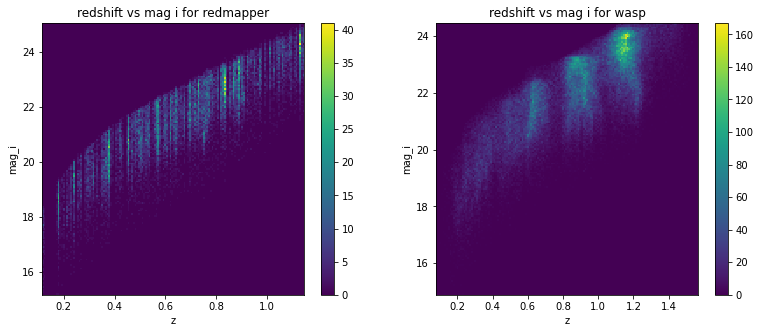

In [373]:
plt.figure(figsize(20,5))
plt.subplot(131)
plt.hist2d(my_new_members['znew'],my_new_members['mag_i'],bins = [150,150],cmap='viridis')
plt.colorbar()
plt.title('redshift vs mag i for redmapper')
plt.xlabel('z')
plt.ylabel('mag_i')
plt.subplot(132)
plt.hist2d(my_new_members_wasp['z'],my_new_members_wasp['mag_i'],bins=150,cmap='viridis')
plt.colorbar()
plt.title('redshift vs mag i for wasp')
plt.xlabel('z')
plt.ylabel('mag_i')
plt.show()


In [309]:
diff_magr_magi=my_new_members['mag_i']-my_new_members['mag_r']

In [310]:
diff_magr_magi_wasp=my_new_members_wasp['mag_i']-my_new_members_wasp['mag_r']

[]


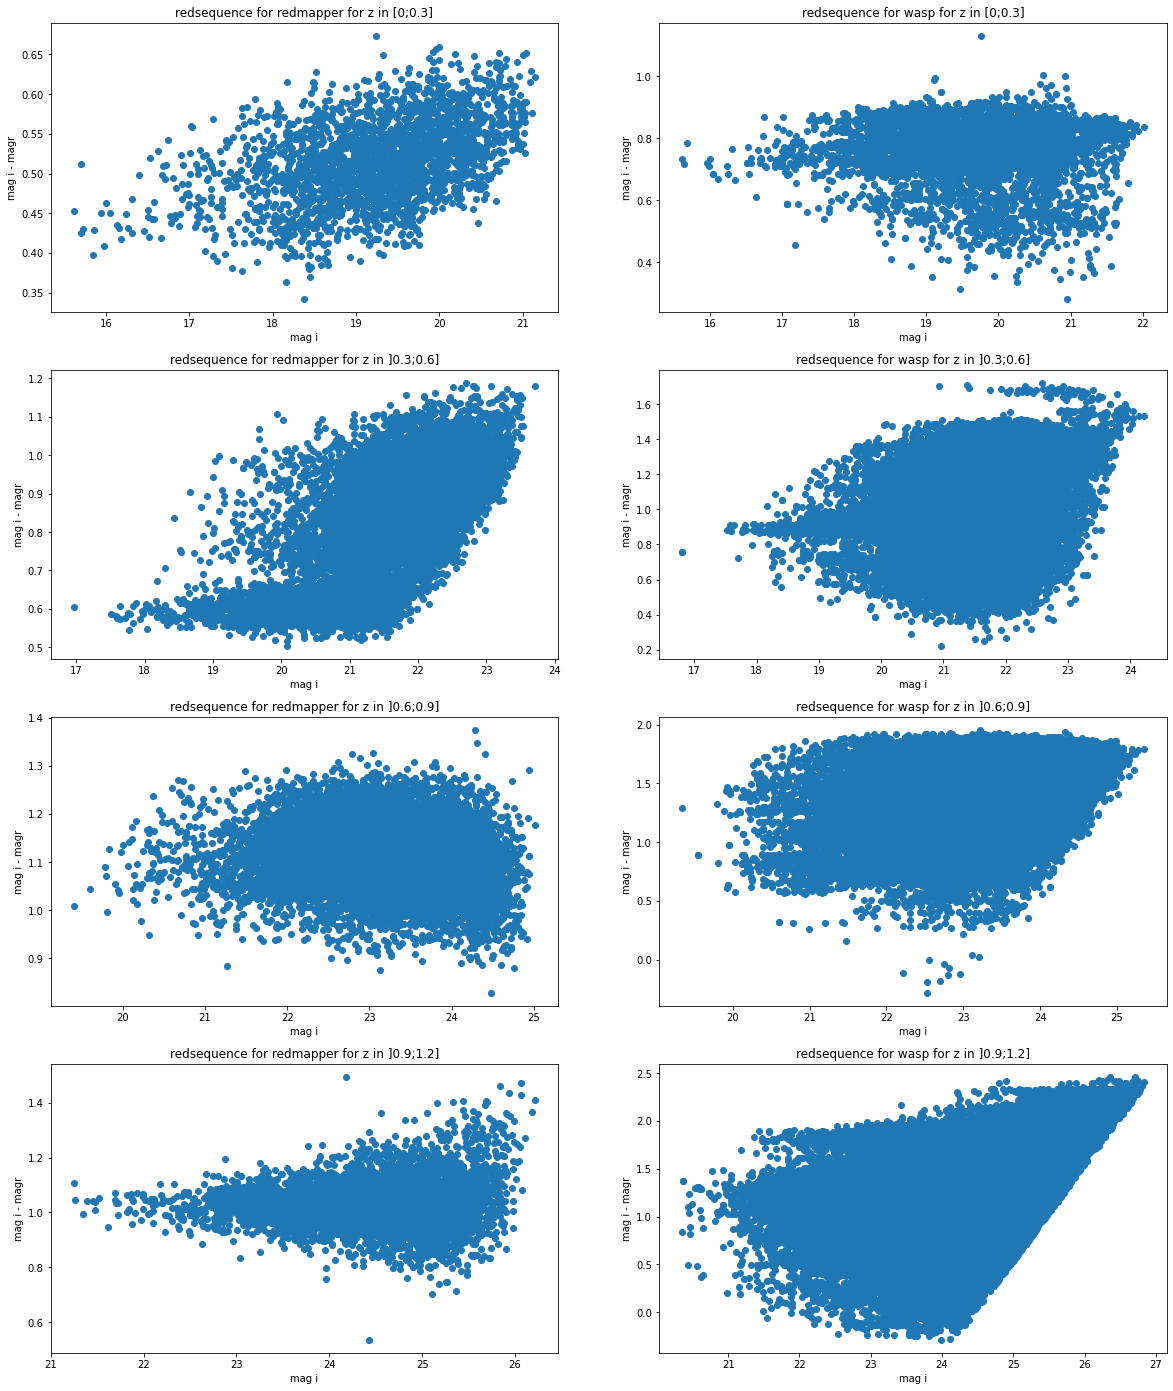

In [374]:
filter_array_z1_red=[]
print(filter_array_z1_red)
for element in my_new_members:
    if (element['znew']>=0 and element['znew']<=0.3):
        filter_array_z1_red.append(True)
    else:
        filter_array_z1_red.append(False)
        
filter_array_z2_red=[]
for element in my_new_members:
    if(element['znew']>0.3 and element['znew']<=0.6):
        filter_array_z2_red.append(True)
    else:
        filter_array_z2_red.append(False)
        
filter_array_z3_red=[]
for element in my_new_members:
    if(element['znew']>0.6 and element['znew']<=0.9):
        filter_array_z3_red.append(True)
    else:
        filter_array_z3_red.append(False)
        
filter_array_z4_red=[]
for element in my_new_members:
    if(element['znew']>0.9 and element['znew']<=1.2):
        filter_array_z4_red.append(True)
    else:
        filter_array_z4_red.append(False)
        
filter_array_z1_wasp=[]
for element in my_new_members_wasp:
    if(element['z']>=0 and element['z']<=0.3):
        filter_array_z1_wasp.append(True)
    else:
        filter_array_z1_wasp.append(False)
        
filter_array_z2_wasp=[]
for element in my_new_members_wasp:
    if(element['z']>0.3 and element['z']<=0.6):
        filter_array_z2_wasp.append(True)
    else:
        filter_array_z2_wasp.append(False)
        
filter_array_z3_wasp=[]
for element in my_new_members_wasp:
    if(element['z']>0.6 and element['z']<=0.9):
        filter_array_z3_wasp.append(True)
    else:
        filter_array_z3_wasp.append(False)
        
filter_array_z4_wasp=[]
for element in my_new_members_wasp:
    if(element['z']>0.9 and element['z']<=1.6):
        filter_array_z4_wasp.append(True)
    else:
        filter_array_z4_wasp.append(False)
members_z1_red=my_new_members[filter_array_z1_red]
members_z2_red=my_new_members[filter_array_z2_red]
members_z3_red=my_new_members[filter_array_z3_red]
members_z4_red=my_new_members[filter_array_z4_red]

members_z1_wasp=my_new_members_wasp[filter_array_z1_wasp]
members_z2_wasp=my_new_members_wasp[filter_array_z2_wasp]
members_z3_wasp=my_new_members_wasp[filter_array_z3_wasp]
members_z4_wasp=my_new_members_wasp[filter_array_z4_wasp]

diff_magr_magi_red_z1 =members_z1_red['mag_r']-members_z1_red['mag_i']
diff_magr_magi_red_z2 =members_z2_red['mag_r']-members_z2_red['mag_i']
diff_magr_magi_red_z3 =members_z3_red['mag_r']-members_z3_red['mag_i']
diff_magr_magi_red_z4 =members_z4_red['mag_r']-members_z4_red['mag_i']

diff_magr_magi_wasp_z1 =members_z1_wasp['mag_r']-members_z1_wasp['mag_i']
diff_magr_magi_wasp_z2 =members_z2_wasp['mag_r']-members_z2_wasp['mag_i']
diff_magr_magi_wasp_z3 =members_z3_wasp['mag_r']-members_z3_wasp['mag_i']
diff_magr_magi_wasp_z4 =members_z4_wasp['mag_r']-members_z4_wasp['mag_i']

                              
plt.figure(figsize=[20,50])
plt.subplot(8,2,1)
plt.scatter(members_z1_red['mag_r'],diff_magr_magi_red_z1)
plt.title('redsequence for redmapper for z in [0;0.3]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,2)
plt.scatter(members_z1_wasp['mag_r'],diff_magr_magi_wasp_z1)
plt.title('redsequence for wasp for z in [0;0.3]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,3)
plt.scatter(members_z2_red['mag_r'],diff_magr_magi_red_z2)
plt.title('redsequence for redmapper for z in ]0.3;0.6]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,4)
plt.scatter(members_z2_wasp['mag_r'],diff_magr_magi_wasp_z2)
plt.title('redsequence for wasp for z in ]0.3;0.6]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,5)
plt.scatter(members_z3_red['mag_r'],diff_magr_magi_red_z3)
plt.title('redsequence for redmapper for z in ]0.6;0.9]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,6)
plt.scatter(members_z3_wasp['mag_r'],diff_magr_magi_wasp_z3)
plt.title('redsequence for wasp for z in ]0.6;0.9]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,7)
plt.scatter(members_z4_red['mag_r'],diff_magr_magi_red_z4)
plt.title('redsequence for redmapper for z in ]0.9;1.2]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.subplot(8,2,8)
plt.scatter(members_z4_wasp['mag_r'],diff_magr_magi_wasp_z4)
plt.title('redsequence for wasp for z in ]0.9;1.2]')
plt.xlabel('mag i')
plt.ylabel('mag i - magr')
plt.show()

In [359]:
print(max(my_new_members_wasp['z']))

1.5685644
